# Теоретические модели вычислений 
## ДЗ №3: Машины Тьюринга и квантовые вычисления
### Тимченко Сергей А-13б-19 

In [418]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.circuit import Qubit
import math

$\newcommand{\Ket}[1]{\left|#1\right>}$
# Генерация суперпозиций 1

Дано $N$ кубитов ($1 \le N \le 8$) в нулевом состоянии $\Ket{0\dots0}$. Также дана некоторая последовательность битов, которое задаёт ненулевое базисное состояние размера $N$. Задача получить суперпозицию нулевого состояния и заданного.

$$\Ket{S} = \frac{1}{\sqrt2}(\Ket{0\dots0} +\Ket{\psi})$$

То есть требуется реализовать операцию, которая принимает на вход:

1. Массив кубитов $q_s$
2. Массив битов $bits$ описывающих некоторое состояние $\Ket{\psi}$. Это массив имеет тот же самый размер, что и $q_s$. Первый элемент этого массива равен $1$.



### Ввод значений

Предлагаю интерактивный вариант: вводим $N$ и массив $bits$. Значение $True$ соответствует любому символу, для ввода $False$ использовать клавишу $Enter$:

In [398]:
N = int(input('Input N '))

q = QuantumRegister(N, name='q')   
bits = [] 

print('------------ Generating psi -----------')
print('Input any symbol if True, skip if False')
for i in range (N):
    bits.append(bool(input()))

print(bits)

Input N 5
------------ Generating psi -----------
Input any symbol if True, skip if False
1

1
1

[True, False, True, True, False]


### Процедура решения

Первый кубит всегда будет различен (это выходит из условия 2). Следовательно для первого кубита всегда применяем оператор Адамара. Далее смотрим на вектор $bits$: если значение элемента равно $True$, т.е. кубит равен $1$, то мы спутываем первый кубит с соответствующим по номеру кубитом. По сути, это частный случай генерации суперпозиции для двух базисных состояний. 

In [402]:
def Solve_First(q, psi):
    global circuit
    circuit.h(0)                    # Hadamar for first qubit
    circuit.barrier()
    for i in range (1, len(psi)):
        if psi[i]:                  # for each 1 qubit in 𝜓 making CNOT
            circuit.cx(q[0], q[i])

### Тест

Запускаем, подаем на вход кубит в нулевом состоянии и массив битов. Сохраняем картинку в файл.  
*Примечание*: почему-то у меня не работает преобразование в $LaTeX$ формат, но можно вытащить сурс отсюда. 

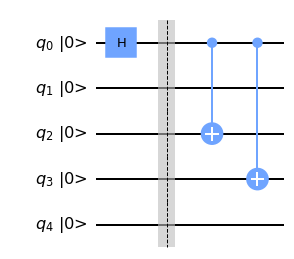

In [403]:
circuit = QuantumCircuit(q)
Solve_First(q, bits)
circuit.draw(output='mpl', filename='circ_1.jpg', initial_state=True)
#circuit.draw(output='latex_source',initial_state=True)

### Проверяем

In [404]:
res = Statevector(circuit)
res.draw('latex')

<IPython.core.display.Latex object>

Ура верный ответ. Задачу решили верно. 

# Различение состояний 1
Дано $N$ кубитов ($1 \le N \le 8$), которые могут быть в одном из двух состояний:

$$ \Ket{GHZ} = \frac{1}{\sqrt2}(\Ket{0\dots0} +\Ket{1\dots1})$$
$$ \Ket{W} = \frac{1}{\sqrt N}(\Ket{10\dots00}+\Ket{01\dots00} + \dots +\Ket{00\dots01})$$

Требуется выполнить необходимые преобразования, чтобы точно различить эти два состояния. Возвращать $0$, если первое состояние и 1, если второе.

### Создание состояний
Сразу же создадим два состояния для проверки работоспособности. Введем новое N:

In [405]:
N = int(input('Input new N: '))

Input new N: 4


Для создания состояний создаем массивы с соотвествующими значениями, как бы раскрываем значение кубитов. Далее переделываем вектор в вектор состояния. Проверим его с помощью построения.

In [406]:
ghz = [1/math.sqrt(2)]
for i in range (1, 2**N-1):
    ghz.append(0)
ghz.append(1/math.sqrt(2))

ghz = Statevector(ghz)
ghz.draw('latex')
#ghz.measure()[0]

<IPython.core.display.Latex object>

В случае второго состояния значения $1 \over \sqrt{N}$ будут только на позициях в векторе, являющихся степенью $2$.

In [407]:
w = [0]
for i in range (1, 2**N):
    if i & i-1:
        w.append(0)
    else:
        w.append(1/math.sqrt(N))
w = Statevector(w)
w.draw('latex')
#w.measure()[0]

<IPython.core.display.Latex object>

### Функция решения 
На вход процедура получает $N$ кубитов. 
Для различения состояний пользуемся следующими соображениями:
1. Первое состояние при измерении дает все кубиты либо 1, либо 0. 
2. Второе состояние при измерении дает только один купит 1, остальные 0. 

Также обратим внимание на особый случай $N=1$:
$$ \Ket{GHZ} = \frac{1}{\sqrt2}(\Ket{0} +\Ket{1})$$
$$ \Ket{W} = \Ket{1}$$

Соответственно алгоритм действий:
- Измеряем кубиты. Кстати $qiskit$ в данном случае поможет сделать это без цикла. 
- Учитываем особый случай и если количество кубитов равно 1 и заданное состояние равно $\Ket{1}$, то определяем его как второе состояние, иначе первое.
- В ином случае, если количество кубитов больше 1, то считаем единичные кубиты, полученные после измерения. 
- Если получили только 1 единичный кубит, то заданное состояние - второе, иначе первое.

In [408]:
One = Statevector([0,1])
One.draw('latex')

<IPython.core.display.Latex object>

In [409]:
def Solve_Second(q):
    str = q.measure()[0]   # measuring qubits 
    if (len(str) == 1):    # exception claimed
        if q == One:
            return 1
        else:
            return 0
    
    i = 0
    for qubit in str:
        if qubit == '1':
            i+=1
    if (i == 1):
        return 1
    else:
        return 0
    return i

### Тест
Подаем в функцию одно из созданных состояний:

In [410]:
Solve_Second(w)

1

# Различение состояний 2 (2 балла)
Дано $2$ кубита, которые могут быть в одном из четырех состояний:

$$\Ket{S_0} = \frac{1}{2}(\Ket{00} + \Ket{01} + \Ket{10} + \Ket{11})$$
$$\Ket{S_1} = \frac{1}{2}(\Ket{00} - \Ket{01} + \Ket{10} - \Ket{11})$$
$$\Ket{S_2} = \frac{1}{2}(\Ket{00} + \Ket{01} - \Ket{10} - \Ket{11})$$
$$\Ket{S_3} = \frac{1}{2}(\Ket{00} - \Ket{01} - \Ket{10} + \Ket{11})$$


Требуется выполнить необходимые преобразования, чтобы точно различить эти четыре состояния. Возвращать требуется индекс состояния (от $0$ до $3$). 

### Создание состояний
Создаем все 4 состояния для дальнейших тестов. Реализация аналогична предыдущему пункту, только в данном случае создание $Statevector$ элементарно. 

In [411]:
S_1 = Statevector([1/2, 1/2, 1/2, 1/2])
S_2 = Statevector([1/2, -1/2, 1/2, -1/2])
S_3 = Statevector([1/2, 1/2, -1/2, -1/2])
S_4 = Statevector([1/2, -1/2, -1/2, 1/2])

# You can check here 
#S_1.draw('latex')
#S_2.draw('latex')
#S_3.draw('latex')
#S_4.draw('latex')

### Альтернативное создание состояний
Кстати, покажу, как можно создать данные состояния с помощью цепей. 
Как создать каждое из состояний:
- Применить к каждому кубиту оператор Адамара (гейт $H$)
- В зависимости от состояний делаем следующее: 
    - Состояние 1: цепь готова после предыдущего пункта 
    - Состояние 2: применяем гейт $Z$ к 1 кубиту 
    - Состояние 3: применяем гейт $Z$ к 2 кубиту
    - Состояние 4: применяем гейт $Z$ к каждому кубиту
    
Предлагаю интерактивно посмотреть на каждое из состояний:

In [413]:
i = int(input('Input number of condition: '))

Input number of condition: 1


In [414]:
q = QuantumRegister(2, name='q')
circuit = QuantumCircuit(q)
circuit.h(range(2))
if (i == 2) or (i == 4):
    circuit.z(0)
if (i == 3) or (i == 4):
    circuit.z(1)
circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

Проверяем:

In [415]:
res = Statevector.from_label('00')
res = res.evolve(circuit)
res.draw('latex')

<IPython.core.display.Latex object>

### Процедура решения 
Идея реализации и решения состоит в применении оператора Адамара для каждого из двух кубитов. За счет этого у нас получатся 4 различных состояния, которые в последтвии мы просто измерим. 
1. Для проведения теоритеческой части нам понадобится матрица оператора Адамара для 2-х кубитов: 

$$
H^{\otimes 2} = \frac{1}{2}
   \begin{pmatrix}\begin{array}{rrrr}
    1 &  1 &  1 &  1\\
    1 & -1 &  1 & -1\\
    1 &  1 & -1 & -1\\
    1 & -1 & -1 &  1
    \end{array}\end{pmatrix}
$$

2. Теперь переведем все 4 состояния в векторный вид:

$$
\Ket{S_1} = \frac{1}{2} \
   \begin{pmatrix}\begin{array}{r}
    1 \\
    1 \\
    1 \\
    1 
    \end{array}\end{pmatrix}, \
\Ket{S_2} = \frac{1}{2} \
   \begin{pmatrix}\begin{array}{r}
    1 \\
    -1 \\
    1 \\
    -1 
    \end{array}\end{pmatrix}, \
\Ket{S_3} = \frac{1}{2} \
   \begin{pmatrix}\begin{array}{r}
    1 \\
    1 \\
    -1 \\
    -1 
    \end{array}\end{pmatrix}, \
\Ket{S_4} = \frac{1}{2} \
   \begin{pmatrix}\begin{array}{r}
    1 \\
    -1 \\
    -1 \\
    1 
    \end{array}\end{pmatrix}
$$

3. Осталось применить оператор Адамара и посмотреть на результат. Предоставлю подробное решение для первого векторного состояния, остальное по аналогии реализуется:

$$
H^{\otimes 2} \Ket{S_1} = \frac{1}{2}
   \begin{pmatrix}\begin{array}{rrrr}
    1 &  1 &  1 &  1\\
    1 & -1 &  1 & -1\\
    1 &  1 & -1 & -1\\
    1 & -1 & -1 &  1
    \end{array}\end{pmatrix} \frac{1}{2} \
   \begin{pmatrix}\begin{array}{r}
    1 \\
    1 \\
    1 \\
    1 
    \end{array}\end{pmatrix} = 
    \frac{1}{4} \
   \begin{pmatrix}\begin{array}{r}
    1 + 1 + 1 + 1 \\
    1 - 1 + 1 - 1 \\
    1 + 1 - 1 - 1 \\
    1 - 1 - 1 + 1
    \end{array}\end{pmatrix} = 
    \frac{1}{4} \
   \begin{pmatrix}\begin{array}{r}
    4 \\
    0 \\
    0 \\
    0
    \end{array}\end{pmatrix} = 
   \begin{pmatrix}\begin{array}{r}
    1 \\
    0 \\
    0 \\
    0
    \end{array}\end{pmatrix}
$$

    Тогда: 
$$
\Ket{S_1} = 
   \begin{pmatrix}\begin{array}{r}
    1 \\
    0 \\
    0 \\
    0 
    \end{array}\end{pmatrix}, \
\Ket{S_2} = 
   \begin{pmatrix}\begin{array}{r}
    0 \\
    1 \\
    0 \\
    0 
    \end{array}\end{pmatrix}, \
\Ket{S_3} = 
   \begin{pmatrix}\begin{array}{r}
    0 \\
    0 \\
    1 \\
    0 
    \end{array}\end{pmatrix}, \
\Ket{S_4} = 
   \begin{pmatrix}\begin{array}{r}
    0 \\
    0 \\
    0 \\
    1 
    \end{array}\end{pmatrix}
$$

4. Переводим обратно наши состояния и получаем:

$$
\Ket{S_1} = \Ket{00}, 
\Ket{S_2} = \Ket{01},
\Ket{S_3} = \Ket{10},
\Ket{S_4} = \Ket{11}.
$$

$\quad \ \ $А это уже как мы знаем легко отличить, просто измерив.

Вообще, грубо говоря, можно было объединить все состояния в одну матрицу (коэффициент вынесем за матрицу) и увидеть следующее:

$$
\begin{pmatrix}\begin{array}{r}
\Ket{S_1} & \Ket{S_2} & \Ket{S_3} & \Ket{S_4}
\end{array}\end{pmatrix}
= \frac{1}{2}
   \begin{pmatrix}\begin{array}{rrrr}
    1 &  1 &  1 &  1\\
    1 & -1 &  1 & -1\\
    1 &  1 & -1 & -1\\
    1 & -1 & -1 &  1
    \end{array}\end{pmatrix}, 
$$

что и являтеся $H^{\otimes 2}$. Значит в соответствии со свойством матрицы Адамара:

$$
H^{\otimes 2 *} = \frac{1}{2}
   \begin{pmatrix}\begin{array}{rrrr}
    1 &  1 &  1 &  1\\
    1 & -1 &  1 & -1\\
    1 &  1 & -1 & -1\\
    1 & -1 & -1 &  1
    \end{array}\end{pmatrix} \\ \\
H^{\otimes 2} H^{\otimes 2*} = \begin{pmatrix}\begin{array}{rrrr}
    1 &  0 &  0 &  0\\
    0 &  1 &  0 &  0\\
    0 &  0 &  1 &  0\\
    0 &  0 &  0 &  1
    \end{array}\end{pmatrix}
$$

In [416]:
def Solve_Third(q):
    global circuit
    circuit.initialize(q)         # putting our statevector into circut
    circuit.h(range(2))           # making Hadamar for both qubits
    
    state = Statevector(circuit)
    res = state.measure()[0]      # measuring qubits 
    if res[0] == '0':
        if res[1] == '0':
            return 0
        else:
            return 1
    else:
        if res[1] == '0':
            return 2
        else:
            return 3

In [417]:
circuit = QuantumCircuit(2)
Solve_Third(S_3)

2